In [27]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [28]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [29]:
fashion_mnist

<module 'keras.api._v2.keras.datasets.fashion_mnist' from '/usr/local/lib/python3.10/dist-packages/keras/api/_v2/keras/datasets/fashion_mnist/__init__.py'>

In [30]:
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

In [31]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(filters=60, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1)))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Conv2D(filters=120, kernel_size=2, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(180, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [32]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 60)        300       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 14, 14, 60)        0         
 g2D)                                                            
                                                                 
 dropout_6 (Dropout)         (None, 14, 14, 60)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 14, 14, 120)       28920     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 7, 7, 120)         0         
 g2D)                                                            
                                                                 
 dropout_7 (Dropout)         (None, 7, 7, 120)        

In [33]:
model.compile(loss='sparse_categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [34]:
model.fit(X_train,
         y_train,
         batch_size=64,
         epochs=10,
         validation_data=(X_test, y_test))

Epoch 1/10
938/938 [==============================] - 8s 6ms/step - loss: 0.5699 - accuracy: 0.7930 - val_loss: 0.3698 - val_accuracy: 0.8661
Epoch 2/10
938/938 [==============================] - 5s 6ms/step - loss: 0.3881 - accuracy: 0.8601 - val_loss: 0.3152 - val_accuracy: 0.8874
Epoch 3/10
938/938 [==============================] - 5s 6ms/step - loss: 0.3447 - accuracy: 0.8752 - val_loss: 0.2922 - val_accuracy: 0.8947
Epoch 4/10
938/938 [==============================] - 5s 6ms/step - loss: 0.3173 - accuracy: 0.8842 - val_loss: 0.2895 - val_accuracy: 0.8925
Epoch 5/10
938/938 [==============================] - 6s 6ms/step - loss: 0.2955 - accuracy: 0.8921 - val_loss: 0.2608 - val_accuracy: 0.9051
Epoch 6/10
938/938 [==============================] - 5s 5ms/step - loss: 0.2786 - accuracy: 0.8980 - val_loss: 0.2471 - val_accuracy: 0.9093
Epoch 7/10
938/938 [==============================] - 6s 6ms/step - loss: 0.2668 - accuracy: 0.9027 - val_loss: 0.2376 - val_accuracy: 0.9125
Epoch 

In [35]:
score = model.evaluate(X_test, y_test, verbose=0)


In [36]:
print('Test accuracy:', score[1])

Test accuracy: 0.9194999933242798


In [37]:
from numpy import asarray
from numpy import unique
from numpy import argmax

In [38]:
image = X_test[0]
result = model.predict(asarray([image]))
print('Predicted: class=%d' % argmax(result))

1/1 [==============================] - 0s 113ms/step
Predicted: class=9


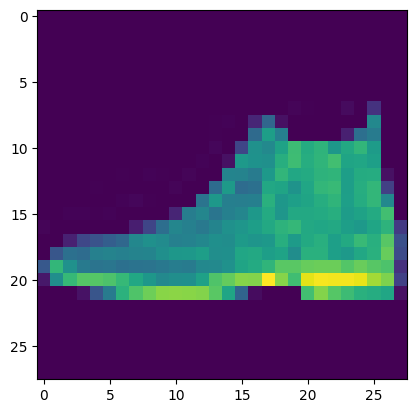

In [39]:
plt.imshow(X_test[0])